# PULSIFI Coding Test Question 2

Build a model to **predict z from x and y**. Some questions to consider: 

1.   What kind of model is appropriate in this case considering the graphs?
2.   How to do feature selection?
3.   How to measure the performance of the model?
4.  How to interpret the result?

## Import necessary libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Get the data

In [2]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#locate the data
!ls "../content/drive/My Drive/ColabNotebooks/pulsifi"

'Data Assessment.gdoc'	 Pulsifi_Q2.ipynb   test.csv


## Exploratory Data Analysis

Let's look what does this data looks like.

In [4]:
df = pd.read_csv("../content/drive/My Drive/ColabNotebooks/pulsifi/test.csv")
df.describe()

,Unnamed: 0,x,y,z
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,0.499059,0.493749,0.496727
std,288.819436,0.287739,0.346935,0.354016
min,0.000000,0.000070,-0.405017,-0.396111
25%,249.750000,0.248916,0.230222,0.236340
50%,499.500000,0.489521,0.485361,0.501613
75%,749.250000,0.745500,0.756520,0.755619
max,999.000000,0.999722,1.387614,1.373976


In [5]:
df.head()

,Unnamed: 0,x,y,z
0,0,0.824922,0.812338,0.698686
1,1,0.288478,0.697308,0.544378
2,2,0.586509,0.715296,0.655423
3,3,0.225562,0.355839,0.542703
4,4,0.030121,-0.097980,0.389870


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
Unnamed: 0    1000 non-null int64
x             1000 non-null float64
y             1000 non-null float64
z             1000 non-null float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [7]:
df = df.drop(columns=["Unnamed: 0"])
df.head()

,x,y,z
0,0.824922,0.812338,0.698686
1,0.288478,0.697308,0.544378
2,0.586509,0.715296,0.655423
3,0.225562,0.355839,0.542703
4,0.030121,-0.097980,0.389870


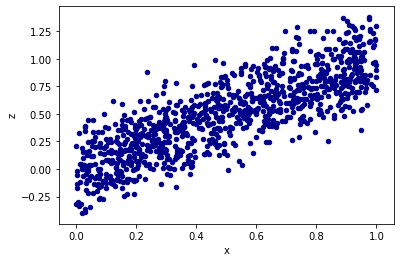

In [8]:
# create a scatter plot for the data for x vs z

ax1 = df.plot.scatter(x='x',
                      y='z',
                      c="DarkBlue")

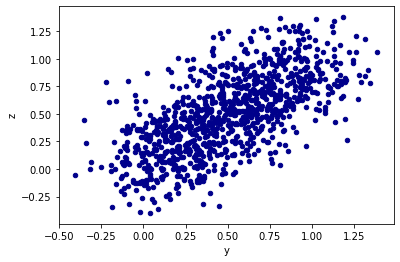

In [9]:
# create a scatter plot for the data for y vs z

ax2 = df.plot.scatter(x='y',
                      y='z',
                      c="DarkBlue")

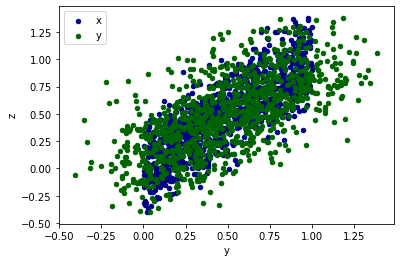

In [10]:
# create a scatter plot for the data for x,y vs z

ax = df.plot(kind='scatter', x='x', y='z', color='DarkBlue', label='x')
df.plot(kind='scatter', x='y', y='z',color='DarkGreen', label='y', ax=ax);


### Plot a desicion boundary for the data



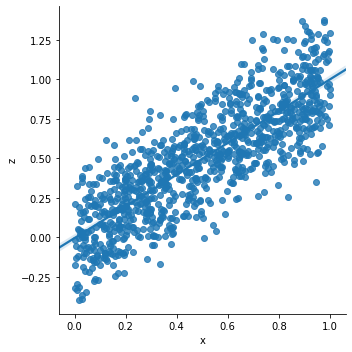

In [11]:
sns.lmplot(x='x',y='z',data=df)

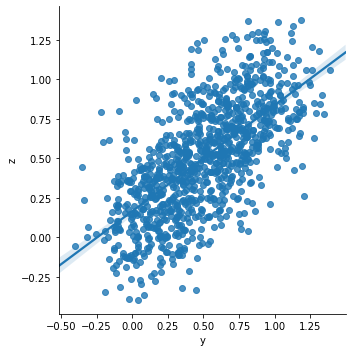

In [12]:
sns.lmplot(x='y',y='z',data=df)

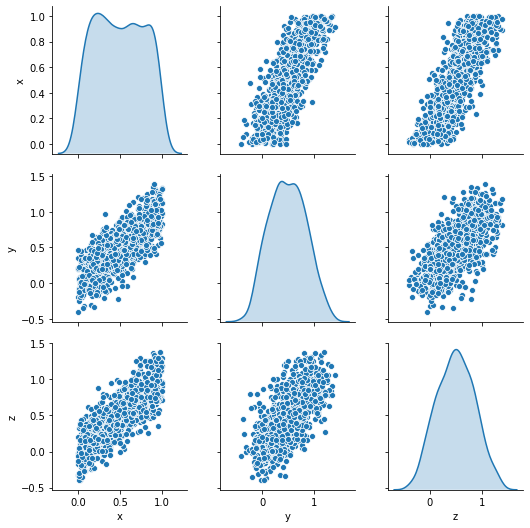

In [13]:
sns.pairplot(df[["x","y","z"]], diag_kind="kde")

### Check the features correlation

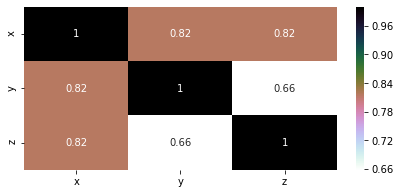

In [14]:
plt.figure(figsize=(7,3)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

Conclusion:

1.   x and y are directly proportional to z
2.   x has a correlation of 0.82 to y, same goes to x to z.
3.   y has a correlation of 0.66 to z. 



## Machine Learning

### Split the data into train and test set


In [15]:
from sklearn.model_selection import train_test_split as split
train, test = split(df, test_size = 0.1)
print (train.shape)
print (test.shape)

(900, 3)
(100, 3)


In [16]:
#get the features for training data
X_train = train[['x','y']]
#output(label) of training data
y_train = train['z']
#get the testing data features and output(label)
X_test = test[['x', 'y']]
y_test = test['z']

print(X_train.shape)

(900, 2)


#### Train and Predict by using Support Vector Machine Regressor

In [17]:
# Create and train the Support Vector Machine (Regressor) 

from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [18]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr.score(X_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.6404218160344326


In [19]:
y_pred = svr.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred

,Actual,Predicted
13,0.049401,-0.030746
844,0.614162,0.212702
664,0.398412,0.189273
269,0.997897,0.780794
720,-0.092484,0.228394
...,...,...
165,0.684949,0.467503
579,0.525803,0.494903
738,0.231537,0.283653
627,0.855463,0.801002


In [20]:
from sklearn.metrics import mean_absolute_error

print("MAE by using SVM is {}.".format(mean_absolute_error(y_test,y_pred)))

MAE by using SVM is 0.16899535621564618.


#### Train and Predict by using Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# Train the model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#To retrieve the intercept:
print(lr.intercept_)
#For retrieving the slope:
print(lr.coef_)

-0.0062586246440604065
[ 1.01635277 -0.00995282]


In [23]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(X_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.6394366686693034


In [24]:
y_pred = lr.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred

,Actual,Predicted
13,0.049401,0.005128
844,0.614162,0.208127
664,0.398412,0.190628
269,0.997897,0.804977
720,-0.092484,0.224706
...,...,...
165,0.684949,0.462502
579,0.525803,0.486724
738,0.231537,0.274887
627,0.855463,0.824511


In [25]:
print("MAE by using linear regression is {} ".format(mean_absolute_error(y_test,y_pred)))

MAE by using linear regression is 0.16913136690701921 


#### Train and Predict by using Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [27]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
rf_confidence = rf.score(X_test, y_test)
print("rf confidence: ", rf_confidence)

rf confidence:  0.6024981588478191


In [28]:
y_pred = rf.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred

,Actual,Predicted
13,0.049401,-0.243169
844,0.614162,0.404081
664,0.398412,0.196345
269,0.997897,0.770231
720,-0.092484,0.271159
...,...,...
165,0.684949,0.443809
579,0.525803,0.624305
738,0.231537,0.298604
627,0.855463,0.921185


In [29]:
print("MAE by using random forest regressor is {} ".format(mean_absolute_error(y_test,y_pred)))

MAE by using random forest regressor is 0.18344455271608948 


#### Train Model by using XGBoost Regressor



In [30]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
# Train the model
xgb.fit(X_train, y_train)

[08:10:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [31]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
xgb_confidence = xgb.score(X_test, y_test)
print("xgb confidence: ", xgb_confidence)

xgb confidence:  0.6163327638290577


In [32]:
y_pred = xgb.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred

,Actual,Predicted
13,0.049401,-0.172455
844,0.614162,0.265928
664,0.398412,0.208245
269,0.997897,0.757832
720,-0.092484,0.264152
...,...,...
165,0.684949,0.505266
579,0.525803,0.517103
738,0.231537,0.286148
627,0.855463,0.834017


In [33]:
print("MAE by using XGBoost regressor is {} ".format(mean_absolute_error(y_test,y_pred)))

MAE by using XGBoost regressor is 0.1753815596308856 


#### Train and Predict by using MLP

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout,  Activation
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

Using TensorFlow backend.


In [0]:
X_train, X_val, y_train, y_val = split(X_train, y_train, test_size = 0.1)

In [36]:
model = Sequential()
model.add(Dense(1000, input_dim=2,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              3000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 504,001
Trainable params: 504,001
Non-trainable params: 0
_____________________________________________________________

In [37]:
!pip install keras-rectified-adam

In [38]:
from keras_radam import RAdam

model.compile(loss='mse', optimizer=RAdam(), metrics=['mse','mae'])
checkpointer = [
    ReduceLROnPlateau(monitor='val_loss', 
                      patience=3, 
                      verbose=1,
                      factor=0.5,
                      min_lr = 0.00001,
                      cooldown=0),
    ModelCheckpoint(filepath='best.hdf5', verbose=1, 
                               save_best_only=True)
]
history = model.fit(X_train, y_train, epochs=150, batch_size=128,  verbose=1, validation_data=[X_val, y_val], shuffle=True, callbacks=checkpointer)
train_acc = model.evaluate(X_train, y_train, verbose=0)
val_acc = model.evaluate(X_val, y_val, verbose=0)





Train on 810 samples, validate on 90 samples
Epoch 1/150





810/810 [==============================] - 1s 1ms/step - loss: 0.3564 - mean_squared_error: 0.3564 - mean_absolute_error: 0.5038 - val_loss: 0.3317 - val_mean_squared_error: 0.3317 - val_mean_absolute_error: 0.4895

Epoch 00001: val_loss improved from inf to 0.33173, saving model to best.hdf5
Epoch 2/150
810/810 [==============================] - 0s 41us/step - loss: 0.3056 - mean_squared_error: 0.3056 - mean_absolute_error: 0.4647 - val_loss: 0.2411 - val_mean_squared_error: 0.2411 - val_mean_absolute_error: 0.4141

Epoch 00002: val_loss improved from 0.33173 to 0.24111, saving model to best.hdf5
Epoch 3/150
810/810 [==============================] - 0s 47us/step - loss: 0.2093 - mean_squared_error: 0.2093 - mean_absolute_error: 0.3772 - val_loss: 0.1422 - val_mean_squared_error: 0.1422 - val_mean_absolute_error: 0.3142

Epoch 00003: val_loss improved from 0.24111 to 0.14218, saving model to best.hdf5
Epoch 4/150
810/81

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error', 'lr'])


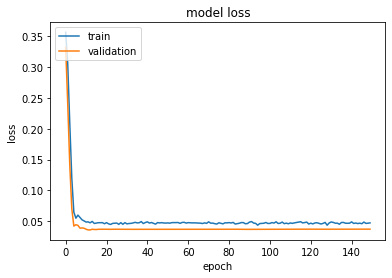

In [39]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('best.hdf5')

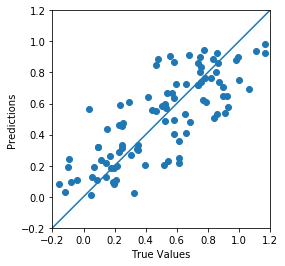

In [41]:
test_predictions =model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [-0.2, 1.2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

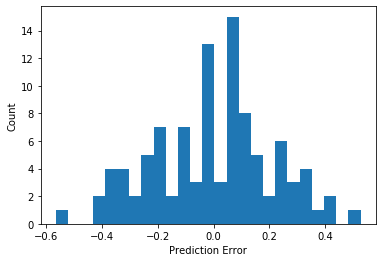

In [42]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [43]:
for true, pred in zip(y_test, test_predictions):
  if pred == true:
    print("{}\t -> {}".format(true, pred))
  else:
    print("\033[1m{}\t -> {}\033[0m".format(true, pred))

0.04940067126296254	 -> 0.01356518268585205
0.6141615708285969	 -> 0.2199002504348755
0.3984123188096231	 -> 0.20692478120326996
0.9978965840938206	 -> 0.7534816265106201
-0.0924840175744363	 -> 0.2401878833770752
0.7400801865108377	 -> 0.7218067049980164
0.7880631014606603	 -> 0.6115131378173828
0.19017066247159695	 -> 0.09776853770017624
0.9813700907273696	 -> 0.8780556321144104
0.5427034494596268	 -> 0.23121504485607147
-0.15827173836667852	 -> 0.08110341429710388
0.8229868397396964	 -> 0.7661005854606628
0.7496656304517695	 -> 0.8988192677497864
-0.09687982334768708	 -> 0.19279342889785767
0.8578917013474171	 -> 0.9224628806114197
0.5032766589850517	 -> 0.5812225341796875
0.7676995005918128	 -> 0.6259902715682983
0.8326112381985449	 -> 0.8857211470603943
0.4668473144244382	 -> 0.5501635670661926
0.1141439097782604	 -> 0.23615336418151855
1.1705448469846258	 -> 0.986457109451294
0.0912964741572509	 -> 0.3176723122596741
0.5369660348415364	 -> 0.6664398312568665
0.5818078806926502	 -

In [44]:
oss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.4f}".format(mae))

Testing set Mean Abs Error: 0.0461


## Conclusion(1):

The classical machine learning model like SVM, XGBoost, Linear regression and random forest have mean absolute error of around 0.18, meanwhile the MLP has a mean absolute error of 0.0434.

As x is correlate to y and z for 0.82, below, I am just going to predict the z by using x values only.

## Predict the z by using x only

#### Use x only as the features

In [45]:
#get the features for training data
X_train = train[['x']]
#output(label) of training data
y_train = train['z']
#get the testing data features and output(label)
X_test = test[['x']]
y_test = test['z']

print(X_train.shape)

(900, 1)


### Using SVM regressor

In [46]:
# Create and train the Support Vector Machine (Regressor) 

from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [47]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr.score(X_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.6400544691181359


In [48]:
y_pred = svr.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred

,Actual,Predicted
13,0.049401,-0.027868
844,0.614162,0.209075
664,0.398412,0.187846
269,0.997897,0.787008
720,-0.092484,0.225654
...,...,...
165,0.684949,0.472273
579,0.525803,0.492043
738,0.231537,0.280709
627,0.855463,0.807788


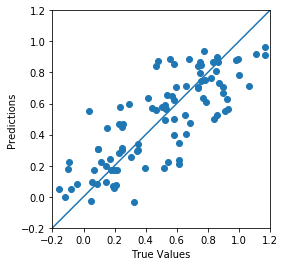

In [49]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred.flatten())
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [-0.2, 1.2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [50]:
print("MAE by using SVM is {}.".format(mean_absolute_error(y_test,y_pred)))

MAE by using SVM is 0.1692266274256607.


### Using MLP

In [0]:
X_train, X_val, y_train, y_val = split(X_train, y_train, test_size = 0.1)

In [52]:
model2 = Sequential()
model2.add(Dense(1000, input_dim=1,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(500, activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='linear'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              2000      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 501       
Total params: 503,001
Trainable params: 503,001
Non-trainable params: 0
_________________________________________________________________


In [53]:
from keras_radam import RAdam

model2.compile(loss='mse', optimizer=RAdam(), metrics=['mse','mae'])
checkpointer = [
    ReduceLROnPlateau(monitor='val_loss', 
                      patience=3, 
                      verbose=1,
                      factor=0.5,
                      min_lr = 0.00001,
                      cooldown=0),
    ModelCheckpoint(filepath='best2.hdf5', verbose=1, 
                               save_best_only=True)
]
history = model2.fit(X_train, y_train, epochs=150, batch_size=128,  verbose=1, validation_data=[X_val, y_val], shuffle=True, callbacks=checkpointer)
train_acc = model2.evaluate(X_train, y_train, verbose=0)
val_acc = model2.evaluate(X_val, y_val, verbose=0)

Train on 810 samples, validate on 90 samples
Epoch 1/150
810/810 [==============================] - 0s 458us/step - loss: 0.3523 - mean_squared_error: 0.3523 - mean_absolute_error: 0.5037 - val_loss: 0.3163 - val_mean_squared_error: 0.3163 - val_mean_absolute_error: 0.4648

Epoch 00001: val_loss improved from inf to 0.31630, saving model to best2.hdf5
Epoch 2/150
810/810 [==============================] - 0s 37us/step - loss: 0.3100 - mean_squared_error: 0.3100 - mean_absolute_error: 0.4693 - val_loss: 0.2538 - val_mean_squared_error: 0.2538 - val_mean_absolute_error: 0.4138

Epoch 00002: val_loss improved from 0.31630 to 0.25380, saving model to best2.hdf5
Epoch 3/150
810/810 [==============================] - 0s 42us/step - loss: 0.2372 - mean_squared_error: 0.2372 - mean_absolute_error: 0.4080 - val_loss: 0.1756 - val_mean_squared_error: 0.1756 - val_mean_absolute_error: 0.3421

Epoch 00003: val_loss improved from 0.25380 to 0.17561, saving model to best2.hdf5
Epoch 4/150
810/810 [=

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error', 'lr'])


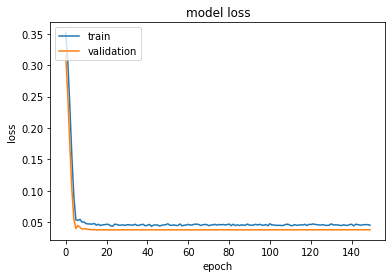

In [54]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
# load the weights that yielded the best validation accuracy
model2.load_weights('best2.hdf5')

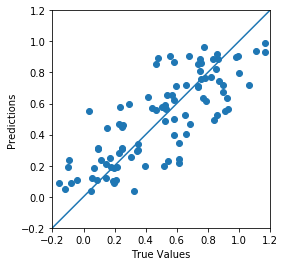

In [56]:
test_predictions =model2.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [-0.2, 1.2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

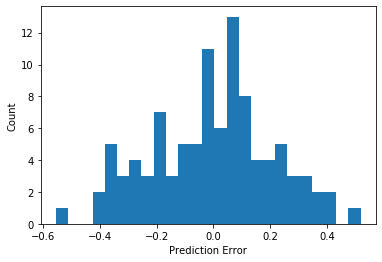

In [57]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [58]:
for true, pred in zip(y_test, test_predictions):
  if pred == true:
    print("{}\t -> {}".format(true, pred))
  else:
    print("\033[1m{}\t -> {}\033[0m".format(true, pred))

0.04940067126296254	 -> 0.03772113099694252
0.6141615708285969	 -> 0.21918201446533203
0.3984123188096231	 -> 0.20027264952659607
0.9978965840938206	 -> 0.7994385957717896
-0.0924840175744363	 -> 0.23408962786197662
0.7400801865108377	 -> 0.7088557481765747
0.7880631014606603	 -> 0.6146700382232666
0.19017066247159695	 -> 0.10042734444141388
0.9813700907273696	 -> 0.9005074501037598
0.5427034494596268	 -> 0.23008815944194794
-0.15827173836667852	 -> 0.08531442284584045
0.8229868397396964	 -> 0.7739593982696533
0.7496656304517695	 -> 0.8862939476966858
-0.09687982334768708	 -> 0.19341649115085602
0.8578917013474171	 -> 0.916383683681488
0.5032766589850517	 -> 0.5774786472320557
0.7676995005918128	 -> 0.6359958648681641
0.8326112381985449	 -> 0.8852530121803284
0.4668473144244382	 -> 0.5594300031661987
0.1141439097782604	 -> 0.23375558853149414
1.1705448469846258	 -> 0.9904158711433411
0.0912964741572509	 -> 0.3080108165740967
0.5369660348415364	 -> 0.6570884585380554
0.5818078806926502	

In [59]:
oss, mae, mse = model2.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.4f}".format(mae))

Testing set Mean Abs Error: 0.0450


### Conclusion (2)

The results are almost the same with predicting `z` from `x ` and `y`. This is due to both of them have more than 0.5 correlations with `z`. So, next, maybe we can transform (scale) the features before fitting it into machine learning models.

### Transform features before fit into machine learning models

In [60]:
from sklearn.model_selection import train_test_split as split
train, test = split(df, test_size = 0.1)
print (train.shape)
print (test.shape)

(900, 3)
(100, 3)


In [61]:
#get the features for training data
X_train = train[['x','y']]
#output(label) of training data
y_train = train['z']
#get the testing data features and output(label)
X_test = test[['x', 'y']]
y_test = test['z']

print(X_train.shape)

(900, 2)


In [62]:
#normalize the data by using MinMaxScaler in sklearn

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=["x","y"])

X_train.head()

,x,y
0,0.078565,0.299199
1,0.187089,0.037151
2,0.391946,0.589443
3,0.578100,0.499916
4,0.664203,0.590054


In [63]:
X_test= scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=["x","y"])

X_test.head()

,x,y
0,0.817659,0.645069
1,0.746303,0.544541
2,0.637878,0.443329
3,0.702502,0.576539
4,0.341308,0.429974


In [64]:
# Create and train the Support Vector Machine (Regressor) 

from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [65]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr.score(X_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.6849300936533622


In [66]:
y_pred = svr.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred

,Actual,Predicted
379,0.750349,0.802755
272,1.131077,0.743022
362,0.767700,0.649205
108,0.533360,0.699349
154,0.353477,0.350938
...,...,...
401,0.539850,0.932425
410,0.339011,0.020745
521,0.585683,0.726468
309,0.538525,0.445729


In [67]:
from sklearn.metrics import mean_absolute_error

print("MAE by using SVM is {}.".format(mean_absolute_error(y_test,y_pred)))

MAE by using SVM is 0.1546197800514787.


#### Predict by using MLP

In [0]:
X_train, X_val, y_train, y_val = split(X_train, y_train, test_size = 0.1)

In [69]:
model3 = Sequential()
model3.add(Dense(1000, input_dim=2,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(500, activation="relu"))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='linear'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              3000      
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 501       
Total params: 504,001
Trainable params: 504,001
Non-trainable params: 0
_________________________________________________________________


In [70]:
from keras_radam import RAdam

model3.compile(loss='mse', optimizer=RAdam(), metrics=['mse','mae'])
checkpointer = [
    ReduceLROnPlateau(monitor='val_loss', 
                      patience=3, 
                      verbose=1,
                      factor=0.5,
                      min_lr = 0.00001,
                      cooldown=0),
    ModelCheckpoint(filepath='best3.hdf5', verbose=1, 
                               save_best_only=True)
]
history = model3.fit(X_train, y_train, epochs=150, batch_size=128,  verbose=1, validation_data=[X_val, y_val], shuffle=True, callbacks=checkpointer)
train_acc = model3.evaluate(X_train, y_train, verbose=0)
val_acc = model3.evaluate(X_val, y_val, verbose=0)

Train on 810 samples, validate on 90 samples
Epoch 1/150
810/810 [==============================] - 0s 563us/step - loss: 0.3085 - mean_squared_error: 0.3085 - mean_absolute_error: 0.4674 - val_loss: 0.3118 - val_mean_squared_error: 0.3118 - val_mean_absolute_error: 0.4784

Epoch 00001: val_loss improved from inf to 0.31181, saving model to best3.hdf5
Epoch 2/150
810/810 [==============================] - 0s 33us/step - loss: 0.2587 - mean_squared_error: 0.2587 - mean_absolute_error: 0.4228 - val_loss: 0.2236 - val_mean_squared_error: 0.2236 - val_mean_absolute_error: 0.4009

Epoch 00002: val_loss improved from 0.31181 to 0.22362, saving model to best3.hdf5
Epoch 3/150
810/810 [==============================] - 0s 42us/step - loss: 0.1704 - mean_squared_error: 0.1704 - mean_absolute_error: 0.3367 - val_loss: 0.1314 - val_mean_squared_error: 0.1314 - val_mean_absolute_error: 0.3057

Epoch 00003: val_loss improved from 0.22362 to 0.13145, saving model to best3.hdf5
Epoch 4/150
810/810 [=

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error', 'lr'])


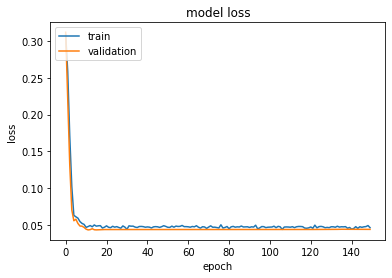

In [71]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
# load the weights that yielded the best validation accuracy
model3.load_weights('best3.hdf5')

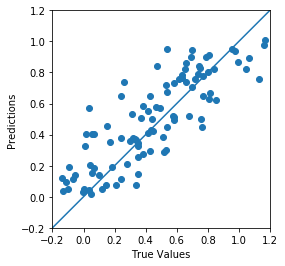

In [73]:
test_predictions =model3.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [-0.2, 1.2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

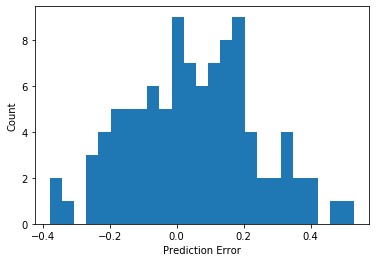

In [74]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [75]:
for true, pred in zip(y_test, test_predictions):
  if pred == true:
    print("{}\t -> {}".format(true, pred))
  else:
    print("\033[1m{}\t -> {}\033[0m".format(true, pred))

0.7503494604588995	 -> 0.8279139399528503
1.1310773300420234	 -> 0.7567045092582703
0.7676995005918128	 -> 0.6513197422027588
0.5333601027741507	 -> 0.7175859212875366
0.3534774786826701	 -> 0.34694164991378784
0.8136118610628993	 -> 0.668598473072052
0.04909035523906497	 -> 0.01827472634613514
0.573803535361349	 -> 0.5217421650886536
-0.0526841513514372	 -> 0.13842345774173737
0.4668473144244382	 -> 0.5753034949302673
0.698977234474618	 -> 0.9416876435279846
0.03805019141229071	 -> 0.5681901574134827
0.31820708188985897	 -> 0.3789852261543274
0.3003182038425564	 -> 0.3607007563114166
0.7537097819097021	 -> 0.49838635325431824
0.7361368769015761	 -> 0.7901482582092285
0.2406021882906227	 -> 0.11264543980360031
0.6979236405964098	 -> 0.7094410061836243
0.09845648370323123	 -> 0.14289335906505585
1.0452869653271601	 -> 0.8197736144065857
0.8080235172396657	 -> 0.6300062537193298
0.9750093372854116	 -> 0.9405978322029114
0.612313220832349	 -> 0.7568948268890381
0.4902889236420346	 -> 0.56

In [76]:
oss, mae, mse = model3.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.4f}".format(mae))

Testing set Mean Abs Error: 0.0375


### Discussions


Multi layer perceptron (MLP) gives you lower mean absolute error compared to the classical machine learning algorithms.

 [Mean Squared Error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) is a common loss function used for regression problems (different loss functions are used for classification problems).

Similarly, evaluation metrics used for regression differ from classification. A common regression metric is [Mean Absolute Error (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error).

When numeric input data features have values with different ranges, each feature should be scaled independently to the same range, so I used the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from Sklearn to do this. I also tried the StandardScaler for feature scaling, but it turns out that MinMaxScaler gives better results than StandardScaler feature scaling.

If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting. 

I have tested with more hidden layers, different batch size and I have found that 2 layers are enough to get a lower MAE. Batch size between 64 to 256 is usually considered good enough for MLP.  

I used [Rectified Adam (RAdam)](https://arxiv.org/pdf/1908.03265.pdf) as the optimizer as it is the newest one and proved to learn better than Adam.

I reduced the learning rate when the validation loss isn't improving and load the best model's weight to predict the data.

I also split the train and test data for classical machine learning algorithms to 9:1 ratio and for MLP, train, validation and test data to 8:1:1 ratio. This is because the more we have for training data, the better the results will it usually be. 

So, below are the full results to predict the `z` from `x` and `y`. 

<table>
  <caption> Table 1 Experimental Results </caption>
  <tr>
    <th>Algorithms</th>
    <th>Feature Scaling</th> 
    <th>Mean Abs Error </th>
  </tr>
    <td>Support Vector Machine Regressor</td>
    <td>No</td>
    <td>0.1670<td>
  </tr>
  <tr>
    <td>Linear Regression </td>
    <td>No</td>
    <td>0.1691</td>
  </tr>
  <tr>
    <td>Random Forest Regressor </td>
    <td>No</td>
    <td>0.1834</td>
  </tr>
  <tr>
    <td>XGBoost Regressor </td>
    <td>No</td>
    <td>0.1753</td>
  </tr>
  <tr>
    <td>Multi-layer Perceptron </td>
    <td>No</td>
    <td>0.0461</td>
  </tr>
  <tr>
    <td>Support Vector Machine Regressor </td>
    <td>Yes</td>
    <td>0.1546<td>
  </tr>
  <tr>
    <td>Multi-layer Perceptron </td>
    <td>Yes</td>
    <td>0.0375</td>
  </tr>
</table>

**Future Works**

1. Increase the accuracy by using LSTM or RNN for neural networks model. But this should only be done if we have more data. Or else, maybe fine tuning the hyperparameters of MLP and other machine learning models will turn out better.
2. Use k-fold cross validation to split the training and validation data.

## Conclusion

Data analysis and machine learning problems are more like trial and error, we need to experiments more to know which models works the best. Besides that, we also need to consider the computing resources and data availability before design the algorithms.
